## Urban Air Quality and Health Impact 


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the publics' health (Health_Risk_Score) is affected by other variables.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/abdullah0a/urban-air-quality-and-health-impact-dataset/data

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [77]:
df = pd.read_csv('data/urban.csv')

#### Show Top 5 Records

In [78]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


#### Shape of the dataset

In [79]:
df.shape

(1000, 46)

### 2.2 Dataset information

- DateTime: Timestamp of the recorded data.
- City: The U.S. city where the data was recorded (e.g., Phoenix, San Diego, New York City).
- Temp_Max: Maximum temperature for the day (°F).
- Temp_Min: Minimum temperature for the day (°F).
- Temp_Avg: Average temperature for the day (°F).
- Feels_Like_Max: Maximum "feels like" temperature for the day (°F).
- Feels_Like_Min: Minimum "feels like" temperature for the day (°F).
- Feels_Like_Avg: Average "feels like" temperature for the day (°F).
- Dew_Point: Dew point temperature (°F).
- Humidity: Relative humidity percentage.
- Precipitation: Total precipitation for the day (inches).
- Precip_Prob: Probability of precipitation (percentage).
- Precip_Cover: Coverage of precipitation (percentage).
- Precip_Type: Type of precipitation (e.g., rain, snow).
- Snow: Amount of snowfall (inches).
- Snow_Depth: Snow depth (inches).
- Wind_Gust: Maximum wind gust speed (mph).
- Wind_Speed: Average wind speed (mph).
- Wind_Direction: Wind direction (degrees).
- Pressure: Atmospheric pressure (hPa).
- Cloud_Cover: Cloud cover percentage.
- Visibility: Visibility distance (miles).
- Solar_Radiation: Solar radiation (W/m²).
- Solar_Energy: Solar energy received (kWh).
- UV_Index: UV index level.
- Severe_Risk: Risk level of severe weather (e.g., low, moderate, high).
- Sunrise: Sunrise time (HH:MM:SS).
- Sunset: Sunset time (HH:MM:SS).
- Moon_Phase: Phase of the moon (e.g., new moon, full moon).
- Conditions: General weather conditions (e.g., clear, cloudy).
- Description: Detailed description of the weather conditions.
- Icon: Weather icon representation.
- Stations: Weather stations reporting data.
- Source: Data source information.
- Temp_Range: Temperature range for the day (difference between max and min temperatures).
- Heat_Index: Heat index value for the day.
- Severity_Score: Score representing the severity of weather conditions.
- Condition_Code: Code representing specific weather conditions.
- Month: Month of the year.
- Season: Season of the year (e.g., winter, spring).
- Day_of_Week: Day of the week.
- Is_Weekend: Indicator if the day is a weekend.
- Health_Risk_Score: Score representing the potential health risk based on weather and air quality conditions.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [80]:
df.isna().sum().sort_values(ascending=False)

stations             933
preciptype           622
Condition_Code       431
snowdepth             71
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
datetime               0
uvindex                0
source                 0
City                   0
Temp_Range             0
Heat_Index             0
Severity_Score         0
Month                  0
Season                 0
Day_of_Week            0
Is_Weekend             0
severerisk             0
solarenergy            0
datetimeEpoch          0
precip                 0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precipprob             0
solarradiation         0
precipcover            0
snow                   0
windgust               0


#### There are 2,057 missing values in the data set

### 3.2 Check Duplicates

In [81]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [82]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1000 non-null   object 
 1   datetimeEpoch      1000 non-null   float64
 2   tempmax            1000 non-null   float64
 3   tempmin            1000 non-null   float64
 4   temp               1000 non-null   float64
 5   feelslikemax       1000 non-null   float64
 6   feelslikemin       1000 non-null   float64
 7   feelslike          1000 non-null   float64
 8   dew                1000 non-null   float64
 9   humidity           1000 non-null   float64
 10  precip             1000 non-null   float64
 11  precipprob         1000 non-null   float64
 12  precipcover        1000 non-null   float64
 13  preciptype         378 non-null    object 
 14  snow               1000 non-null   float64
 15  snowdepth          929 non-null    float64
 16  windgust           1000 n

### 3.4 Checking the number of unique values of each column

In [83]:
df.nunique()

datetime               15
datetimeEpoch         895
tempmax               951
tempmin               948
temp                  970
feelslikemax          962
feelslikemin          951
feelslike             971
dew                   972
humidity              978
precip                885
precipprob            890
precipcover           857
preciptype              1
snow                    1
snowdepth               1
windgust              914
windspeed             891
winddir               996
pressure              952
cloudcover            982
visibility            868
solarradiation        991
solarenergy           932
uvindex               860
severerisk            854
sunrise               148
sunriseEpoch         1000
sunset                145
sunsetEpoch          1000
moonphase             870
conditions              4
description            12
icon                    4
stations               10
source                  2
City                   10
Temp_Range            963
Heat_Index  

### 3.5 Check statistics of data set

In [84]:
df.describe()

,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunriseEpoch,sunsetEpoch,moonphase,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Health_Risk_Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,569.0,1000.0,1000.000000
mean,1.726284e+09,85.106961,68.641638,76.115967,85.195384,68.547548,76.323286,57.267120,56.782281,0.032135,...,12.923695,1.726309e+09,1.726353e+09,0.383811,16.469899,80.195613,3.057743,0.0,9.0,9.729103
std,3.745834e+05,9.524231,8.474102,8.722070,9.496951,8.365809,8.621361,9.161517,16.708667,0.083461,...,8.838858,3.753453e+05,3.753012e+05,0.147229,5.552785,6.053805,0.624024,0.0,0.0,0.679728
min,1.725624e+09,62.035432,49.108218,55.548415,62.206413,48.834041,57.748822,26.261814,11.752135,-0.021213,...,7.507579,1.725668e+09,1.725686e+09,0.123494,1.676587,65.511677,1.578048,0.0,9.0,8.492431
25%,1.725948e+09,78.661118,62.678245,69.102499,78.485332,62.734961,68.930104,51.229378,49.982029,-0.000511,...,9.705341,1.725976e+09,1.726021e+09,0.247940,13.319119,76.287207,2.583375,0.0,9.0,9.195244
50%,1.726285e+09,84.322847,67.702405,75.222751,84.284077,67.844544,75.544961,58.598490,58.486182,0.004000,...,10.080919,1.726312e+09,1.726352e+09,0.385185,16.694710,78.562345,3.026242,0.0,9.0,9.546156
75%,1.726616e+09,91.653987,75.585109,82.396698,93.757026,75.591093,84.309449,62.738294,66.560400,0.015258,...,10.860683,1.726642e+09,1.726687e+09,0.516248,20.734495,85.318985,3.507127,0.0,9.0,10.242523
max,1.727021e+09,107.797400,91.635546,99.851684,105.060170,89.369854,98.193984,76.648668,92.459293,0.471666,...,61.727919,1.726991e+09,1.727027e+09,0.649488,29.790757,96.684162,5.158112,0.0,9.0,11.485725


### 3.6 checking various categories present in the different categorical column

In [85]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    print(f'Column: {col}')
    print(f'Categories: {unique_values}')
    print('---')

Column: datetime
Categories: ['2024-09-07' '2024-09-08' '2024-09-09' '2024-09-10' '2024-09-11'
 '2024-09-12' '2024-09-13' '2024-09-14' '2024-09-15' '2024-09-16'
 '2024-09-17' '2024-09-18' '2024-09-19' '2024-09-20' '2024-09-21']
---
Column: preciptype
Categories: [nan "['rain']"]
---
Column: sunrise
Categories: ['06:06:50' '06:07:30' '06:08:10' '06:08:49' '06:09:29' '06:10:09'
 '06:10:49' '06:11:29' '06:12:09' '06:12:49' '06:13:29' '06:14:09'
 '06:14:50' '06:15:30' '06:16:10' '06:43:31' '06:44:20' '06:45:10'
 '06:45:59' '06:46:48' '06:47:38' '06:48:27' '06:49:17' '06:50:06'
 '06:50:56' '06:51:45' '06:52:35' '06:53:25' '06:54:15' '06:55:05'
 '07:14:53' '07:15:25' '07:15:56' '07:16:26' '07:16:57' '07:17:28'
 '07:17:59' '07:18:30' '07:19:01' '07:19:32' '07:20:03' '07:20:35'
 '07:21:06' '07:21:37' '07:22:09' '06:31:08' '06:31:49' '06:32:31'
 '06:33:12' '06:33:53' '06:34:35' '06:35:16' '06:35:57' '06:36:39'
 '06:37:20' '06:38:02' '06:38:43' '06:39:25' '06:40:07' '06:40:49'
 '06:27:38' '06:28

### 4. Feature Engineering

- Importing Libraries
- Handling Missing values
    - Handling numerical missing values
    - Handling categorical missing values
- Encoding

### 4.1 Importing Libraries

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder

### 4.2 Handling Missing values

##### 4.2.1 Handling numerical missing values

In [87]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputer to the dataframe (excluding non-numeric columns)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)


##### 4.2.2 Handling categorical missing values

In [88]:
# Fill missing values in categorical columns with mode
df_categorical = df.select_dtypes(include=['object', 'category'])

for col in df_categorical.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop(columns=['stations'])

#### Encode Cetegorical Columns

In [89]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [90]:
# Convert to string with specified format
df['datetimeEpoch'] = df['datetimeEpoch'].apply(lambda x: f'{x:.2f}')

#### re-checking if there is any missing values left

In [91]:
df.isnull().sum().sort_values(ascending=False)

datetime             0
solarenergy          0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week          0
Is_Weekend           0
uvindex              0
solarradiation       0
datetimeEpoch        0
visibility           0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover 

### 5. Visualization
- Violin Plot of Health Risk Scores
- Distribution of Average Temperature
- lineplot of tempmax
- Temperature Trends Over Time
- Temperature vs Humidity
- Correlation Heatmap

#### 5.1 Violin Plot of Health Risk Scores

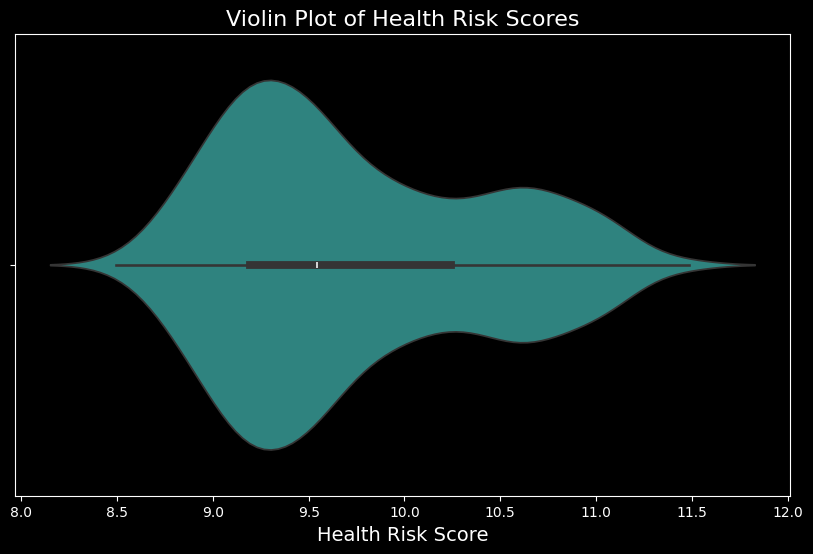

In [92]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Health_Risk_Score'], palette='viridis')  
plt.title('Violin Plot of Health Risk Scores', fontsize=16, color='white')
plt.xlabel('Health Risk Score', fontsize=14, color='white')
plt.show()

#### 5.2 Distribution plot of Average Temperature

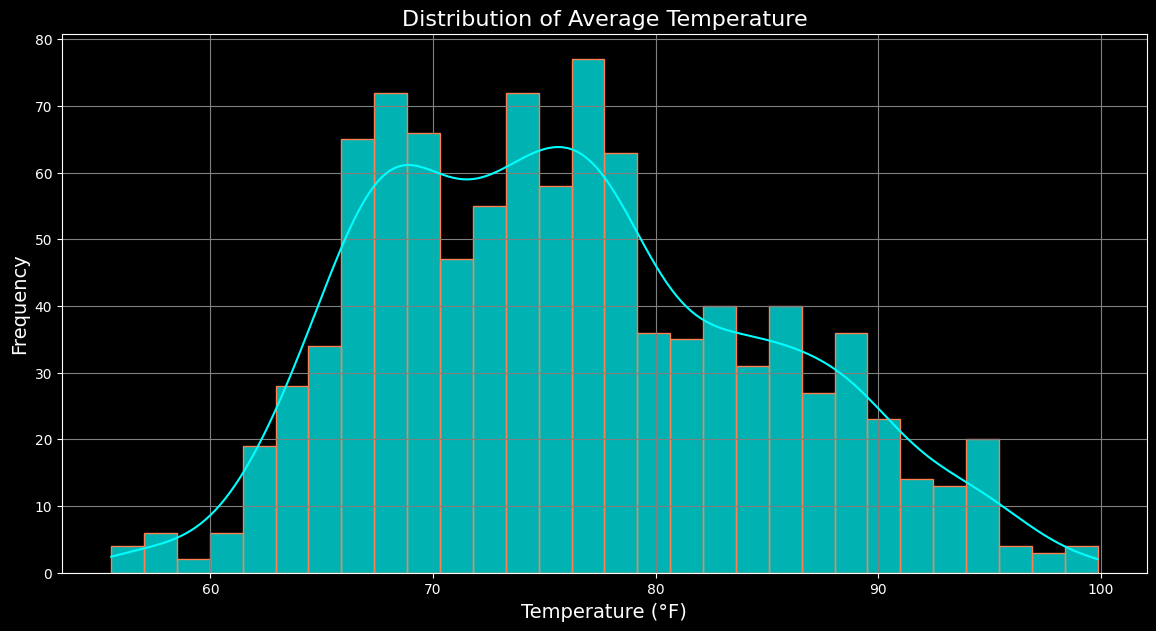

In [93]:
plt.figure(figsize=(14, 7))
sns.histplot(df['temp'], bins=30, kde=True, color='cyan', edgecolor='coral', alpha=0.7)
plt.title('Distribution of Average Temperature', fontsize=16, color='white')
plt.xlabel('Temperature (°F)', fontsize=14, color='white')
plt.ylabel('Frequency', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

#### 5.3 Lineplot of tempmax

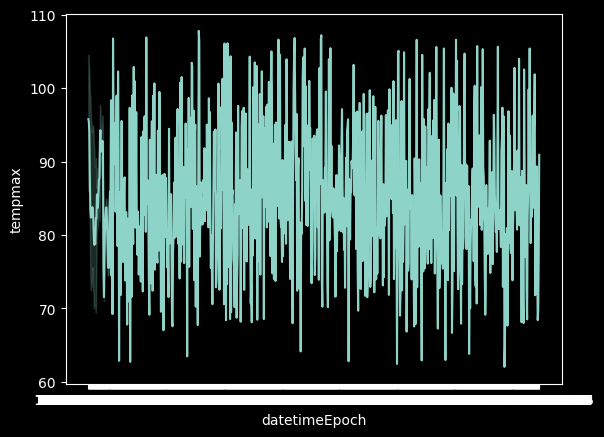

In [94]:
sns.lineplot(data=df, x='datetimeEpoch', y='tempmax')
plt.show()

#### 5.4 Temperature trends over time

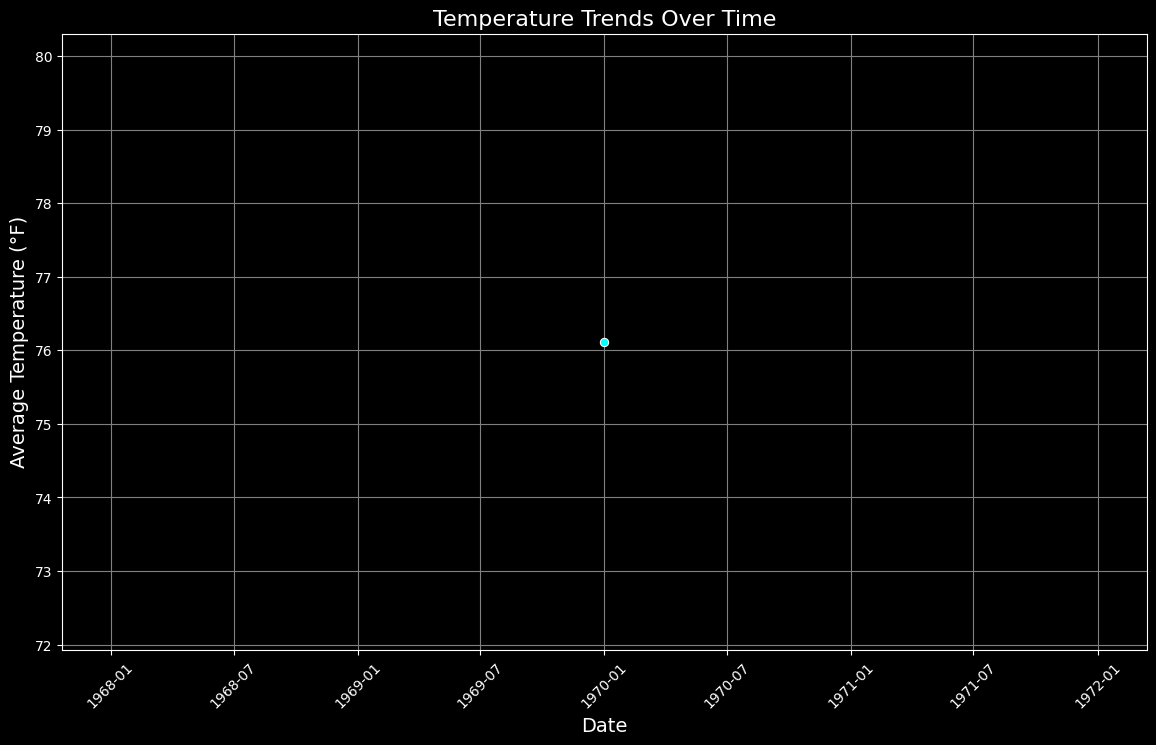

In [95]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Temperature Trends Over Time
plt.figure(figsize=(14, 8))
df_grouped = df.groupby(df['datetime'].dt.date).agg({'temp': 'mean'}).reset_index()
sns.lineplot(x='datetime', y='temp', data=df_grouped, color='cyan', linewidth=2.5, marker='o')
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Temperature (°F)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True,color='gray')
plt.show()

#### 5.5 Scatter plot for Temperature vs Humidity

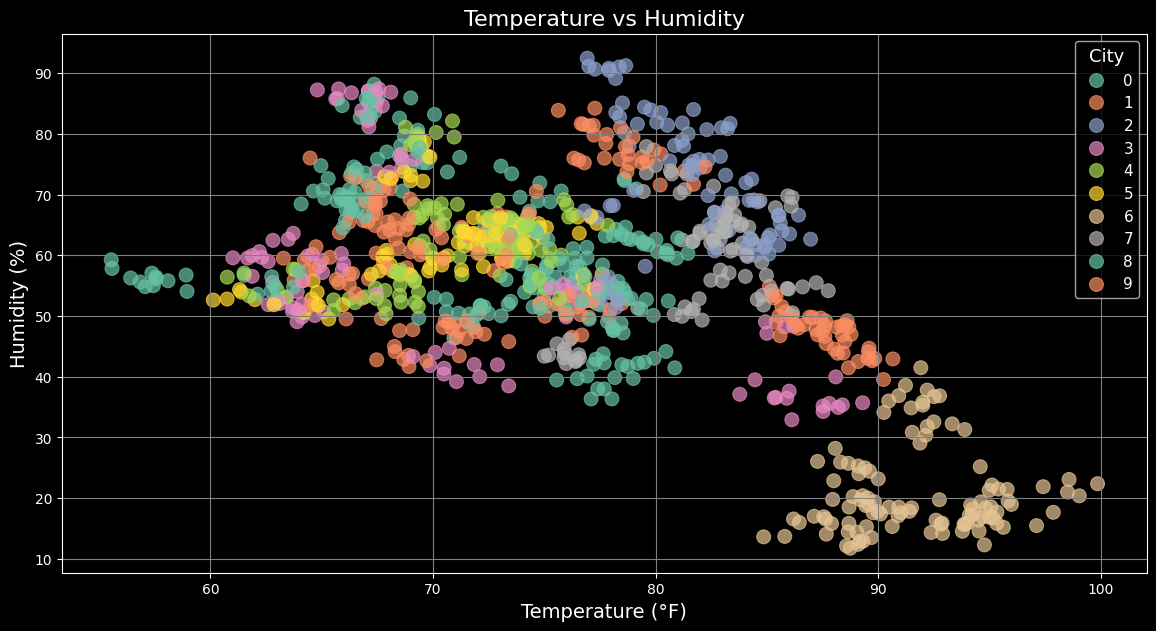

In [96]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='temp', y='humidity', hue='City', data=df, palette='Set2', alpha=0.7, s=100, edgecolor=None)
plt.title('Temperature vs Humidity', fontsize=16)
plt.xlabel('Temperature (°F)', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.legend(title='City', title_fontsize='13', fontsize='11')
plt.grid(True,color='gray')
plt.show()

#### 5.6 Correlation Analysis

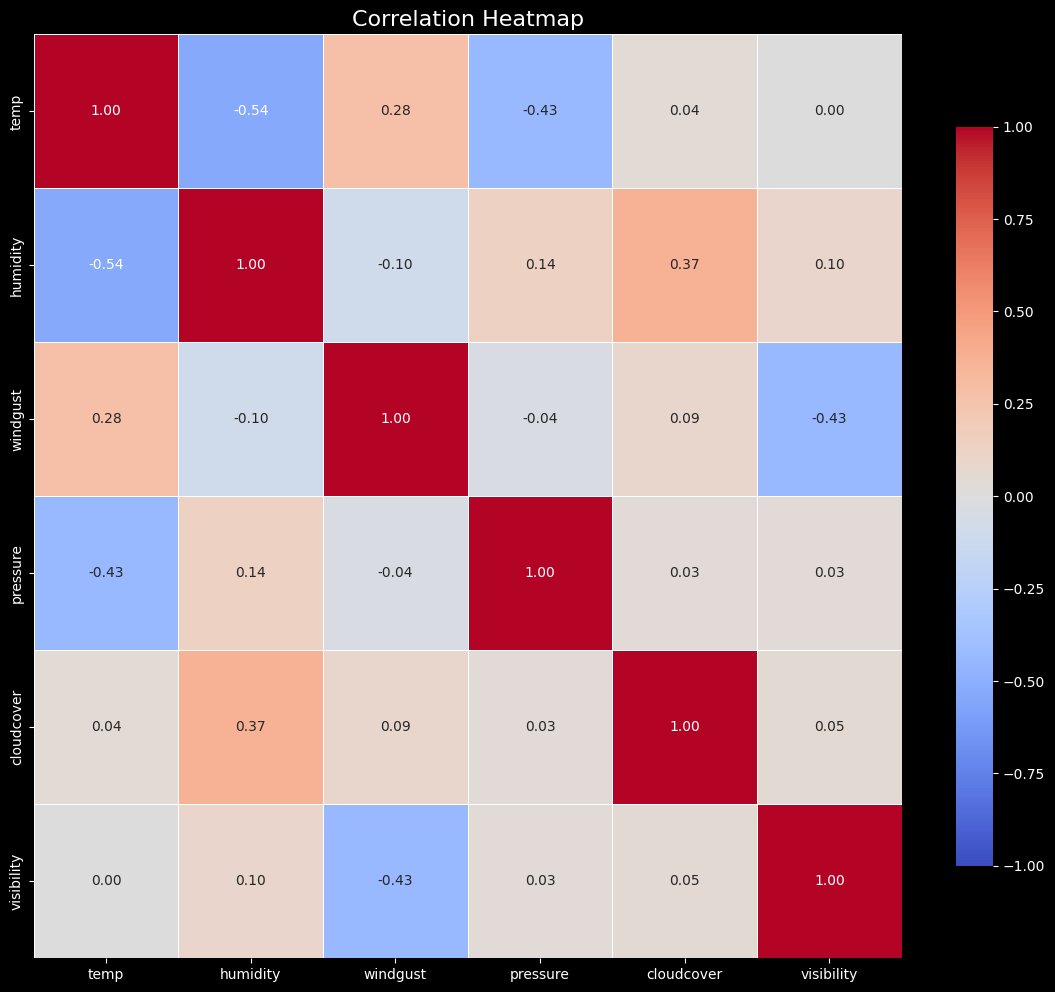

In [97]:
plt.figure(figsize=(14, 12))
corr = df[['temp', 'humidity', 'windgust', 'pressure', 'cloudcover', 'visibility']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16, color='white')
plt.show()

In [98]:
df.isnull().sum().sort_values(ascending=False)

datetime             0
solarenergy          0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week          0
Is_Weekend           0
uvindex              0
solarradiation       0
datetimeEpoch        0
visibility           0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover 

In [99]:
df.isna().sum().sort_values(ascending=False)

datetime             0
solarenergy          0
severerisk           0
sunrise              0
sunriseEpoch         0
sunset               0
sunsetEpoch          0
moonphase            0
conditions           0
description          0
icon                 0
source               0
City                 0
Temp_Range           0
Heat_Index           0
Severity_Score       0
Condition_Code       0
Month                0
Season               0
Day_of_Week          0
Is_Weekend           0
uvindex              0
solarradiation       0
datetimeEpoch        0
visibility           0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype           0
snow                 0
snowdepth            0
windgust             0
windspeed            0
winddir              0
pressure             0
cloudcover 

In [100]:
df.to_csv('data/clean_data.csv', index=False)
